TASK 1 - Data Acquisition and Data Wrangling on dataset 1 and dataset 2 
[All methods to be applied for data wrangling concerning the listed above and combine_data from dataset1 and dataset2, Work on central tendency.]


In [381]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [382]:
# IMPORTING DATA
dataset1 = pd.read_excel(r'C:\Users\Jovita\NextHikes_Projects\Project 1\Dataset_1.xlsx')
dataset2 = pd.read_excel(r'C:\Users\Jovita\NextHikes_Projects\Project 1\Dataset_2.xlsx')

In [383]:
dataset1.head()                                                                                           

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,1,0,False,6,1,0.24
1,2,2011-01-01,1,0,1,1,False,6,1,0.22
2,3,2011-01-01,1,0,1,2,False,6,1,0.22
3,4,2011-01-01,1,0,1,3,False,6,1,0.24
4,5,2011-01-01,1,0,1,4,False,6,1,0.24


In [384]:
dataset1.shape

(610, 10)

In [385]:
dataset2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


In [386]:
dataset2.shape

(610, 8)

Merge Datasets - Combing 2 datasets using a common column

In [387]:
# on = 'instant'
merge_dataset = pd.merge(dataset1,dataset2, on = 'instant')

In [388]:
merge_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,False,6,1,0.24,0,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,False,6,1,0.22,1,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,False,6,1,0.22,2,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,False,6,1,0.24,3,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,False,6,1,0.24,4,0.2879,0.75,0.0,0,1,1


In [389]:
# Dropping drop_duplicates
drop_duplicates = merge_dataset.drop_duplicates

In [390]:
# Identify unique values
unique_values = merge_dataset.nunique()

In [391]:
unique_values

instant       610
dteday         28
season          1
yr              1
mnth            1
hr             24
holiday         2
weekday         7
weathersit      4
temp           23
Unnamed: 0    610
atemp          29
hum            61
windspeed      20
casual         32
registered    150
cnt           165
dtype: int64

In [392]:
# Dropped a specific column
merge_dataset.drop('Unnamed: 0', axis= 1, inplace= True)    

In [393]:
merge_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [394]:
# Convert date column to datetime
merge_dataset['dteday'] = pd.to_datetime(merge_dataset['dteday'])

In [395]:
# Convert date to YYYYMMDD format
merge_dataset['dteday'] = merge_dataset['dteday'].dt.strftime('%Y%m%d').astype(int)

In [396]:
# Checking missing value
merge_dataset.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
weathersit     0
temp           0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [397]:
# Replace '?' by np.nan
merge_dataset.replace('?', np.nan, inplace = True)

In [398]:
# Treat Missing Values
merge_dataset['atemp'].unique()

array([0.2879, 0.2727, 0.2576,    nan, 0.3485, 0.3939, 0.3333, 0.4242,
       0.4545, 0.4394, 0.4091, 0.2273, 0.2121, 0.197 , 0.1364, 0.1061,
       0.1212, 0.1667, 0.1818, 0.2424, 0.1515, 0.3182, 0.0606, 0.0758,
       0.0909, 0.303 , 0.0303, 0.0455, 0.    , 0.0152])

In [399]:
merge_dataset['atemp'] = merge_dataset['atemp'].astype('float64')

In [400]:
merge_dataset['atemp'].mean()

0.19993489148580967

In [401]:
merge_dataset['atemp'].replace(np.nan, merge_dataset['atemp'].mean(), inplace = True)

In [402]:
# Checking the number of missing values in the Data
merge_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [403]:
# Dropped Missing Values/ Rows
merge_dataset.dropna(inplace= True)
merge_dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,20110101,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,20110101,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,20110101,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,20110101,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,20110101,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,20110128,1,0,1,11,False,5,3,0.18,0.2121,0.93,0.1045,0,30,30
606,607,20110128,1,0,1,12,False,5,3,0.18,0.2121,0.93,0.1045,1,28,29
607,608,20110128,1,0,1,13,False,5,3,0.18,0.2121,0.93,0.1045,0,31,31
608,609,20110128,1,0,1,14,False,5,3,0.22,0.2727,0.80,0.0000,2,36,38


In [404]:
# Checking the dimensions of the dataset
dimensions = merge_dataset.shape

In [405]:
rows, columns = merge_dataset.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 610 rows and 16 columns.


In [406]:
# Checking the data type of the dataset
merge_dataset.dtypes

instant         int64
dteday          int32
season          int64
yr              int64
mnth            int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [407]:
# Get a summary of the data.
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   dteday      610 non-null    int32  
 2   season      610 non-null    int64  
 3   yr          610 non-null    int64  
 4   mnth        610 non-null    int64  
 5   hr          610 non-null    int64  
 6   holiday     610 non-null    bool   
 7   weekday     610 non-null    int64  
 8   weathersit  610 non-null    int64  
 9   temp        610 non-null    float64
 10  atemp       610 non-null    float64
 11  hum         610 non-null    float64
 12  windspeed   610 non-null    float64
 13  casual      610 non-null    int64  
 14  registered  610 non-null    int64  
 15  cnt         610 non-null    int64  
dtypes: bool(1), float64(4), int32(1), int64(10)
memory usage: 69.8 KB


In [408]:
# Statistical details of the data.
merge_dataset.describe()

,instant,dteday,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,610.000000,6.100000e+02,610.0,610.0,610.0,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,305.500000,2.011011e+07,1.0,0.0,1.0,11.795082,2.977049,1.477049,0.196885,0.199935,0.562475,0.204851,4.501639,51.068852,55.570492
std,176.236111,7.803859e+00,0.0,0.0,0.0,6.852107,2.054943,0.643496,0.081304,0.078120,0.175440,0.121806,6.319945,47.021204,49.316802
min,1.000000,2.011010e+07,1.0,0.0,1.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,153.250000,2.011011e+07,1.0,0.0,1.0,6.000000,1.000000,1.000000,0.160000,0.151500,0.432500,0.104500,0.000000,14.000000,16.000000
50%,305.500000,2.011011e+07,1.0,0.0,1.0,12.000000,3.000000,1.000000,0.200000,0.197000,0.520000,0.194000,2.000000,43.000000,47.000000
75%,457.750000,2.011012e+07,1.0,0.0,1.0,18.000000,5.000000,2.000000,0.235000,0.227300,0.690000,0.283600,6.000000,70.000000,79.750000
max,610.000000,2.011013e+07,1.0,0.0,1.0,23.000000,6.000000,4.000000,0.460000,0.454500,1.000000,0.582100,47.000000,247.000000,249.000000


CENTRAL TENDENCY

In [409]:
# Mode
merge_dataset['cnt'].mode()

0    1
Name: cnt, dtype: int64

In [410]:
# Median
merge_dataset['cnt'].median()

47.0

In [411]:
# Mean
merge_dataset['cnt'].mean()

55.570491803278685

In [412]:
merge_dataset['cnt'].value_counts()

cnt
1      32
2      20
3      20
5      15
57     10
       ..
202     1
162     1
158     1
117     1
119     1
Name: count, Length: 165, dtype: int64

TASK 2 - Data Acquisition and Wrangling on Dataset 3. 
. Concatenate combine_ data with Dataset_3. To be Worked on missing values and outliers.
. Check the skewness and correlation of the data.  

In [413]:
# Importing Data
Dataset_3 = pd.read_excel(r"C:\Users\Jovita\NextHikes_Projects\Project 1\Dataset_3.xlsx")

In [414]:
Dataset_3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [415]:
Dataset_3.shape

(390, 16)

In [416]:
Dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     390 non-null    int64         
 1   dteday      390 non-null    datetime64[ns]
 2   season      390 non-null    int64         
 3   yr          390 non-null    int64         
 4   mnth        390 non-null    int64         
 5   hr          390 non-null    int64         
 6   holiday     390 non-null    bool          
 7   weekday     390 non-null    int64         
 8   weathersit  390 non-null    int64         
 9   temp        390 non-null    float64       
 10  atemp       390 non-null    float64       
 11  hum         390 non-null    float64       
 12  windspeed   390 non-null    float64       
 13  casual      390 non-null    int64         
 14  registered  390 non-null    int64         
 15  cnt         390 non-null    int64         
dtypes: bool(1), datetime64[ns]

In [417]:
# Convert date column to datetime
Dataset_3['dteday'] = pd.to_datetime(Dataset_3['dteday'])

In [418]:
# Convert date to YYYYMMDD format
Dataset_3['dteday'] = Dataset_3['dteday'].dt.strftime('%Y%m%d').astype(int)

In [419]:
# Checking the number of missing values in the Data
Dataset_3.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [420]:
# Checking the data type of the dataset
Dataset_3.dtypes

instant         int64
dteday          int32
season          int64
yr              int64
mnth            int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [421]:
# Concatenate the data
concat_data3=pd.concat([merge_dataset,Dataset_3],axis=0)
concat_data3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,20110101,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,20110101,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,20110101,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,20110101,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,20110101,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [422]:
# Checking the number of missing values in the Data
concat_data3.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [423]:
# Statistical details of the data.
concat_data3.describe()

,instant,dteday,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,1000.000000,1.000000e+03,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.011014e+07,1.0,0.0,1.312000,11.753000,2.982000,1.480000,0.205900,0.211826,0.582480,0.194931,4.921000,53.383000,58.304000
std,288.819436,4.312056e+01,0.0,0.0,0.463542,6.899101,2.091423,0.651171,0.078977,0.076290,0.187977,0.129126,7.643899,47.893968,50.985558
min,1.000000,2.011010e+07,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,2.011011e+07,1.0,0.0,1.000000,6.000000,1.000000,1.000000,0.160000,0.166700,0.440000,0.104500,0.000000,15.000000,16.000000
50%,500.500000,2.011012e+07,1.0,0.0,1.000000,12.000000,3.000000,1.000000,0.200000,0.212100,0.550000,0.164200,3.000000,46.000000,49.000000
75%,750.250000,2.011020e+07,1.0,0.0,2.000000,18.000000,5.000000,2.000000,0.240000,0.257600,0.700000,0.283600,6.000000,74.000000,83.000000
max,1000.000000,2.011021e+07,1.0,0.0,2.000000,23.000000,6.000000,4.000000,0.460000,0.454500,1.000000,0.582100,62.000000,247.000000,249.000000


In [424]:
# Finding outliers using statistical methods
q1 = concat_data3['cnt'].quantile(.25)
q3 = concat_data3['cnt'].quantile(.75)

In [425]:
def find_outliers(df,cols):
    # Calculate the first and third quartiles
    q1 = concat_data3[cols].quantile(.25)
    q3 = concat_data3[cols].quantile(.75)
    # Calculate the interquartile range
    IQR = q3-q1
    # Calculate the lower and upper limits for outliers
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    # Find the outliers
    outliers= df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
    # Return the outliers
    return outliers

In [426]:
find_outliers(concat_data3,'cnt')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,20110101,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,20110101,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,20110101,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,20110101,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,20110101,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,20110128,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,20110128,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,20110128,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,20110128,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [427]:
IQR=q3-q1
IQR

67.0

<Axes: ylabel='cnt'>

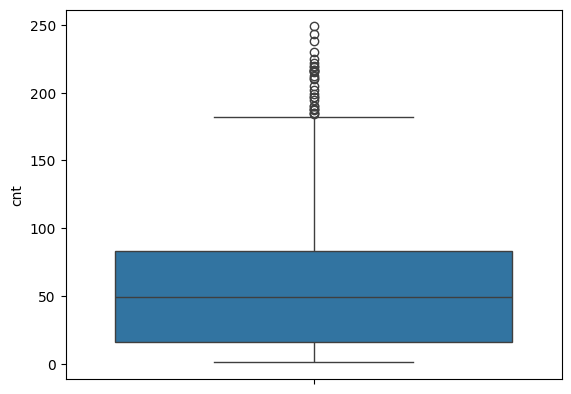

In [428]:
# Outliers Visualization Using Box Plot
sns.boxplot(concat_data3 ['cnt'])

Text(0.5, 1.0, 'Rentals by weathersit')

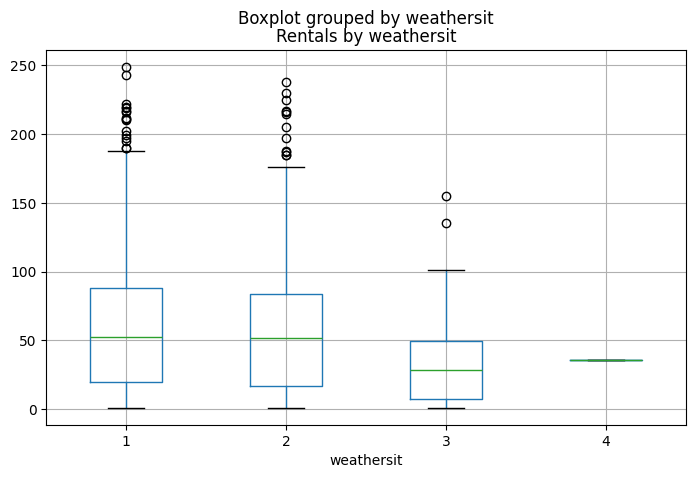

In [445]:
concat_data3.boxplot(by='weathersit', column='cnt', figsize=(8,5))
plt.title("Rentals by weathersit")

Text(0.5, 1.0, 'Rentals by Holiday')

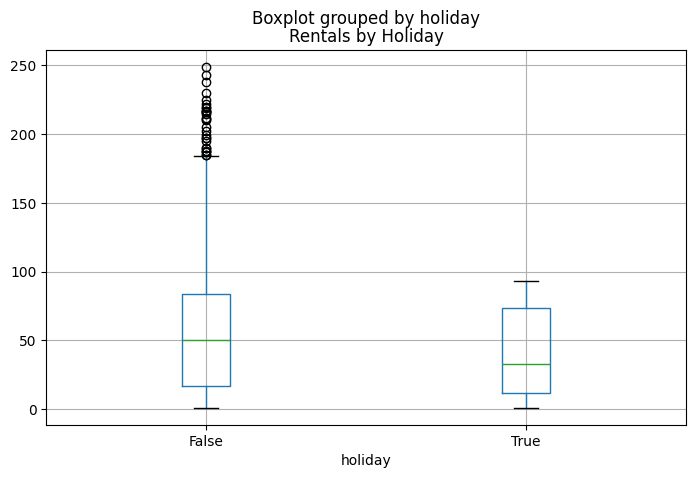

In [440]:
concat_data3.boxplot(by='holiday', column='cnt', figsize=(8,5))
plt.title("Rentals by Holiday")

Text(0.5, 1.0, 'Rentals by Month')

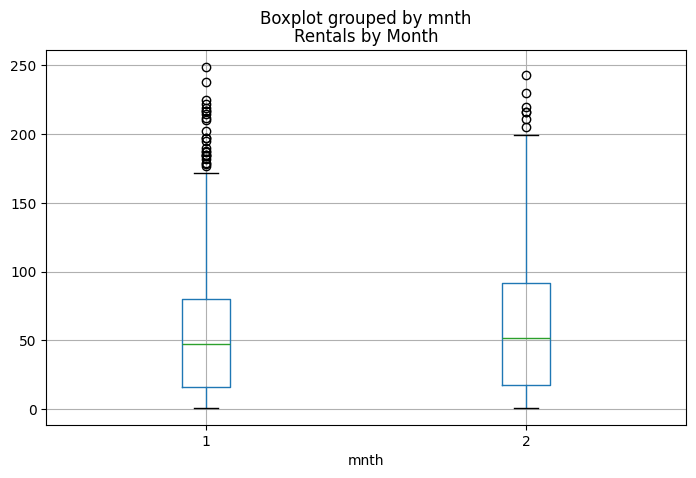

In [429]:
concat_data3.boxplot(by='mnth', column='cnt', figsize=(8,5))
plt.title("Rentals by Month")

Text(0.5, 1.0, 'Rentals by Year')

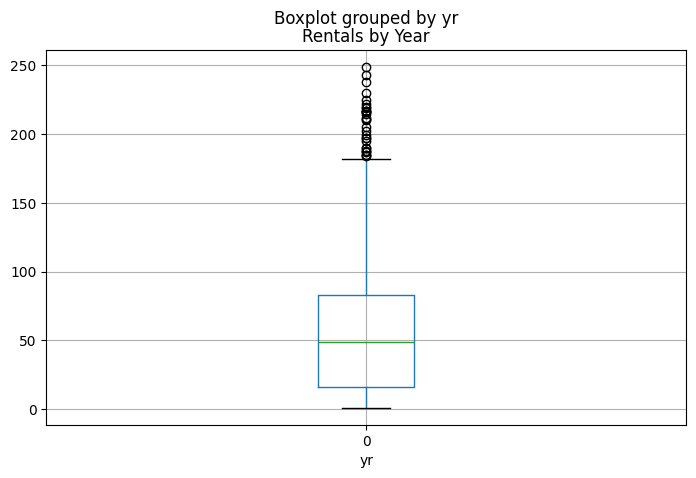

In [430]:
concat_data3.boxplot(by='yr', column='cnt', figsize=(8,5))
plt.title("Rentals by Year")

Text(0.5, 1.0, 'Rentals by Season')

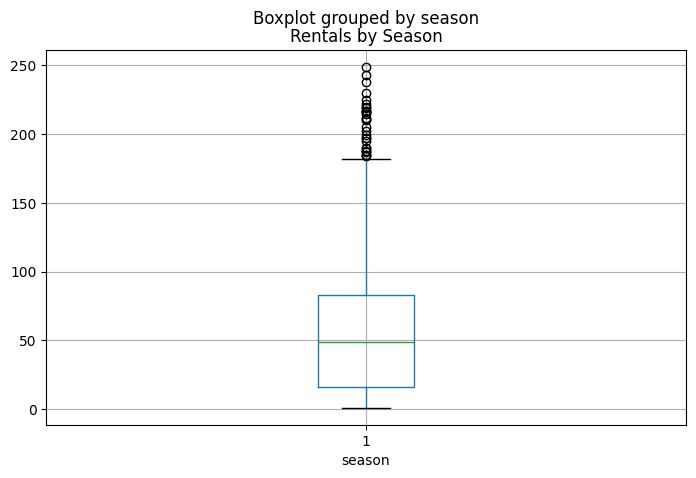

In [431]:
concat_data3.boxplot(by='season', column='cnt', figsize=(8,5))
plt.title("Rentals by Season")

Text(0.5, 1.0, 'Rentals by Season and Year')

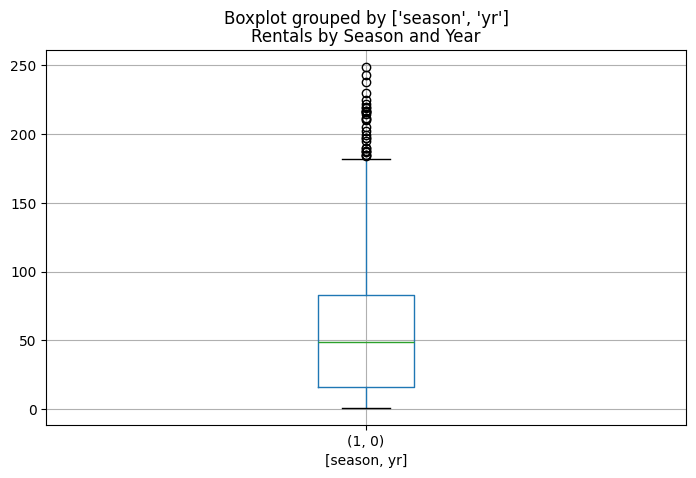

In [432]:
concat_data3.boxplot(by=['season','yr'], column='cnt', figsize=(8,5))
plt.title("Rentals by Season and Year")

Text(0.5, 1.0, 'Rentals by Hour')

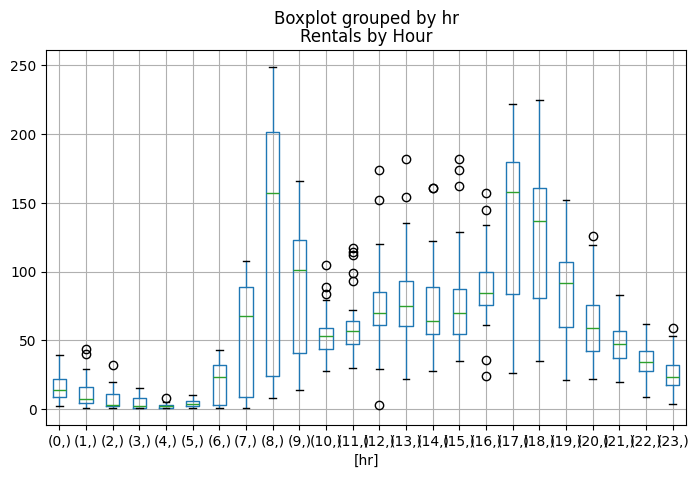

In [433]:
concat_data3.boxplot(by=['hr'], column='cnt', figsize=(8,5))
plt.title("Rentals by Hour")

Text(0.5, 1.0, 'Rentals by Weekday')

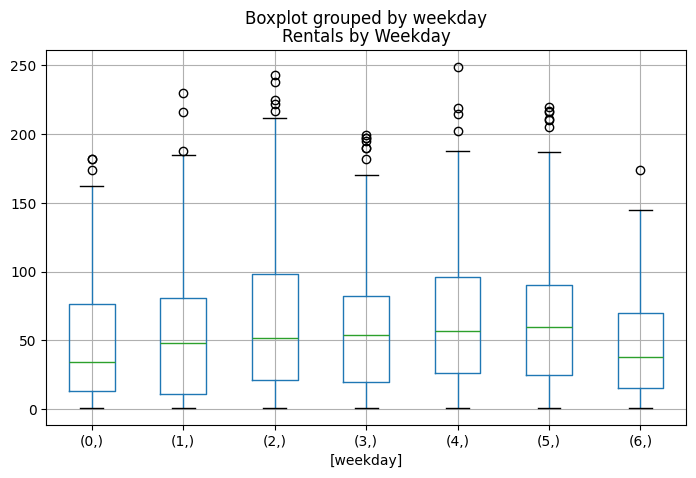

In [434]:
concat_data3.boxplot(by=['weekday'], column='cnt', figsize=(8,5))
plt.title("Rentals by Weekday")

In [435]:
# Correlation of the data
concat_data3.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.896134,NaN,NaN,0.802477,0.000060,-0.063013,0.008157,0.030439,0.023406,0.077546,0.062116,-0.057837,0.071259,0.074993,0.081129
dteday,0.896134,1.000000,NaN,NaN,0.983870,-0.025773,-0.098936,0.028831,0.020457,0.125153,0.166261,0.071512,-0.041106,0.085083,0.074061,0.082326
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.802477,0.983870,NaN,NaN,1.000000,-0.025646,-0.105600,0.034710,0.014061,0.159660,0.192216,0.066587,-0.029383,0.088326,0.072660,0.081496
hr,0.000060,-0.025773,NaN,NaN,-0.025646,1.000000,-0.005753,0.007531,-0.055802,0.203512,0.148524,-0.194853,0.116640,0.204476,0.357042,0.366047
holiday,-0.063013,-0.098936,NaN,NaN,-0.105600,-0.005753,1.000000,-0.148682,0.165443,-0.059728,-0.072091,-0.037542,-0.001111,-0.000944,-0.054350,-0.051196
weekday,0.008157,0.028831,NaN,NaN,0.034710,0.007531,-0.148682,1.000000,0.060007,-0.081776,-0.051646,0.062469,-0.056754,-0.047363,0.020505,0.012161
weathersit,0.030439,0.020457,NaN,NaN,0.014061,-0.055802,0.165443,0.060007,1.000000,0.106041,0.136962,0.539402,-0.177655,-0.096346,-0.119234,-0.126448
temp,0.023406,0.125153,NaN,NaN,0.159660,0.203512,-0.059728,-0.081776,0.106041,1.000000,0.909940,0.080720,0.122625,0.470221,0.169045,0.229292


Checking the skewness of the data.

In [436]:
# Applying the skew method in the specified parameters
concat_data3.skew(axis=0, skipna=True, numeric_only=(int, float))

instant       0.000000
dteday        0.726639
season        0.000000
yr            0.000000
mnth          0.812772
hr           -0.063524
holiday       6.229578
weekday       0.021925
weathersit    1.044098
temp          0.547997
atemp         0.435927
hum           0.436893
windspeed     0.433675
casual        3.414105
registered    1.296723
cnt           1.137709
dtype: float64

<Axes: xlabel='holiday', ylabel='Density'>

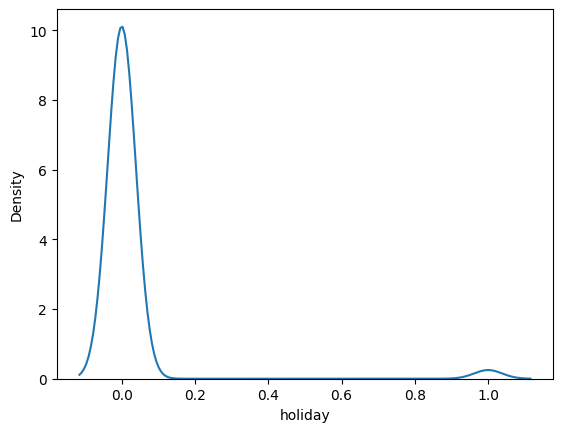

In [441]:
# Plot univariate distribution
sns.kdeplot(data=concat_data3, x="holiday")

<Axes: xlabel='weathersit', ylabel='Density'>

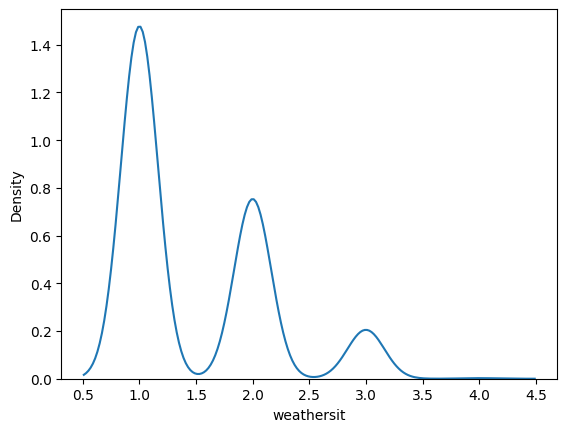

In [444]:
sns.kdeplot(data=concat_data3, x="weathersit")

<Axes: xlabel='casual', ylabel='Density'>

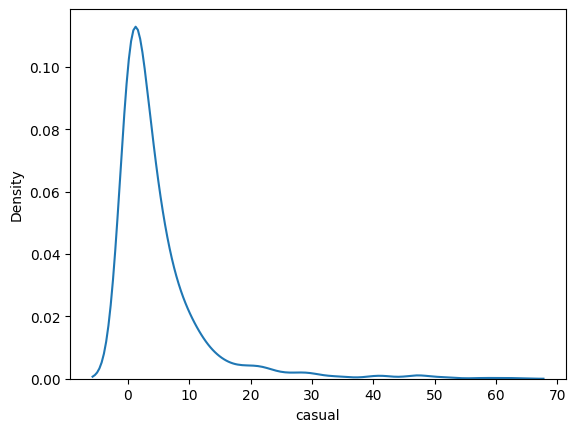

In [443]:
sns.kdeplot(data=concat_data3, x="casual")

<Axes: xlabel='registered', ylabel='Density'>

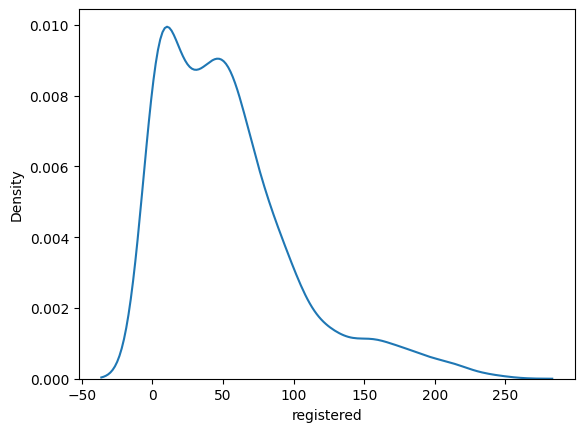

In [438]:
sns.kdeplot(data=concat_data3, x="registered")

<Axes: xlabel='cnt', ylabel='Density'>

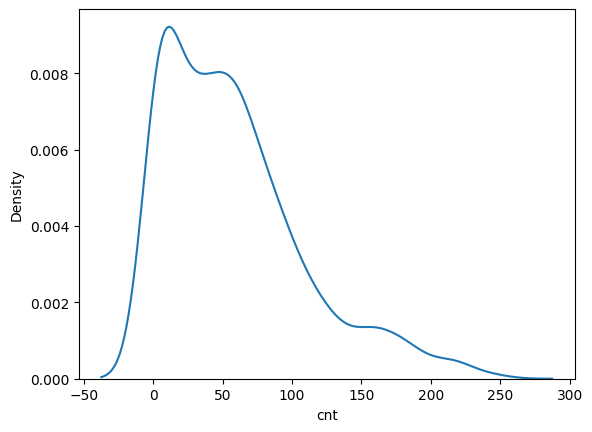

In [439]:
sns.kdeplot(data=concat_data3, x="cnt")

Conclusion

Type of project: Data Acquisition & Data Wrangling

Dataset selection: Used the datasets provided by the Mentor.

Discarded fields: Unnamed: 0

Features: ‘season’, ’ yr’, ’ mnth’, ’ hr’, ’ holiday’, ’ weekday’, ’ workingday’, ’ weathersit’, ’ temp’, ’ hum’, ’windspeed’

Label - ‘cnt’

Libraries used : Pandas, Numpy, Matplotlib, Seaborn.

. Import the data. Analyze the data.

. Drop the irrelevant fields.

. Understand the data.

. Preprocess the data for modelling (Data Cleaning).

. Work on central tendency.

. Worked on missing values and outliers.

. Check the skewness and correlation of the data.

. Analyze the data through visualizations using Boxplot.

The figures of rentals changes depending on the features given in the dataset.